In [5]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import requests
import json
import matplotlib.pyplot as plt

In [6]:
with open("stadiums_nfl.json") as datafile:
  data = json.load(datafile)
dataframe = pd.DataFrame(data)

In [7]:
dataframe.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-87.61676997...",2017-04-13T04:48:16-04:00,acaab7736b25dbc81055f02ceb96041ea791aab6
1,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-95.41091997...",2017-04-13T04:48:16-04:00,b6b73850e7110b440b11ba18a3d5d18c4a4df399
2,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-94.48388009...",2017-04-13T04:48:16-04:00,dae0180f6c4107dbc52ea4174d0e331e135d8e74
3,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-90.08127999...",2017-04-13T04:48:16-04:00,bb9e7a8c6e5b57f863029203999e7fe3877b50ed
4,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-80.23888995...",2017-04-13T04:48:16-04:00,2c453332d4240ec71639594550cd223109270786


In [10]:
# Store filepath in a variable
file_one = "stadiums_nfl_type.csv"
file_two = "nfl_data.csv"

In [11]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
stadiums_nfl_df = pd.read_csv(file_one, encoding="ISO-8859-1")
stadiums_score_df = pd.read_csv(file_two)

In [12]:
# Show just the header
stadiums_nfl_df.head()

,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR 1,COLOR 2
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow
1,Oakland,Oakland Raiders,Open,63026.0,37.75233,-122.19990,West,silver,NaN
2,San Diego,San Diego Chargers,Open,71294.0,32.78322,-117.11976,West,gold,dodgerblue
3,San Francisco,San Francisco 49ers,Open,70207.0,37.71399,-122.38673,West,gold,NaN
4,Denver,Denver Broncos,Open,76125.0,39.74396,-105.02028,West,navy,NaN


In [13]:
stadiums_score_df.head()

,Unnamed: 0,schedule_date,schedule_season,team_home,score_home,score_away,stadium,win/loss
0,11076,09/04/2014,2014,Seattle Seahawks,36.0,16.0,CenturyLink Field,W
1,11077,09/07/2014,2014,Atlanta Falcons,37.0,34.0,Georgia Dome,W
2,11078,09/07/2014,2014,Baltimore Ravens,16.0,23.0,M&T Bank Stadium,L
3,11079,09/07/2014,2014,Chicago Bears,20.0,23.0,Soldier Field,L
4,11080,09/07/2014,2014,Dallas Cowboys,17.0,28.0,Cowboys Stadium,L


In [14]:
# Export file as a CSV, without the Pandas index, but with the header
#stadiums_nfl_df_type.to_csv("stadiums_nfl_type.csv", index=False, header=True)

In [15]:
# Export file as a CSV, without the Pandas index, but with the header
#merge_stadiums_df.to_csv("stadiums_nfl_merge.csv", index=False, header=True)

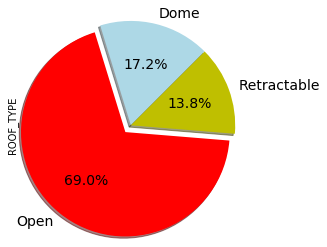

In [16]:
stadiums_nfl_df.ROOF_TYPE.groupby(stadiums_nfl_df.ROOF_TYPE).size().plot(kind='pie',explode = [0, 0.1, 0],
                                                                         autopct='%1.1f%%',
                                                                         radius=1.2, 
                                                                         startangle=45,
                                                                         colors=['LightBlue','R','Y'],
                                                                         shadow=True, fontsize=14)


#plt.title('ROOF_TYPE')
plt.savefig("ROOF_TYPEpie.png",bbox_inches='tight')
plt.show()



In [18]:
#stadiums_merge_df = pd.concat([stadiums_nfl_df, stadiums_score_df], axis=1)

stadiums_score_df['schedule_season'] = stadiums_score_df['schedule_season'].astype(object)
stadiums_merge_df= pd.merge(stadiums_nfl_df, stadiums_score_df, how='left', left_on=['TEAM'], right_on=['team_home'])
stadiums_merge_df.drop(['Unnamed: 0','team_home'], axis=1, inplace=True)
stadiums_merge_df.head()


,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR 1,COLOR 2,schedule_date,schedule_season,score_home,score_away,stadium,win/loss
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,09/08/2014,2014,18.0,17.0,University of Phoenix Stadium,W
1,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,09/21/2014,2014,23.0,14.0,University of Phoenix Stadium,W
2,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,10/12/2014,2014,30.0,20.0,University of Phoenix Stadium,W
3,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,10/26/2014,2014,24.0,20.0,University of Phoenix Stadium,W
4,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,11/09/2014,2014,31.0,14.0,University of Phoenix Stadium,W


In [24]:
stadiums_merge_df.rename(columns={'COLOR 1':'COLOR1', 'COLOR 2':'COLOR2','win/loss': 'WIN_LOSS','schedule_date':'SCHEDULE DATE',
                                 'schedule_season':'SCHEDULE SEASON','team_home':'TEAM HOME','score_home':'HOME SCORE',
                                  'stadium':'STADIUM','score_away':'AWAY SCORE'}, inplace=True)


stadiums_merge_df.head()


,CITY,TEAM,ROOF_TYPE,CAPACITY,LATITUDE,LONGITUDE,REGION,COLOR1,COLOR2,SCHEDULE DATE,SCHEDULE SEASON,HOME SCORE,AWAY SCORE,STADIUM,WIN_LOSS
0,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,09/08/2014,2014,18.0,17.0,University of Phoenix Stadium,W
1,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,09/21/2014,2014,23.0,14.0,University of Phoenix Stadium,W
2,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,10/12/2014,2014,30.0,20.0,University of Phoenix Stadium,W
3,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,10/26/2014,2014,24.0,20.0,University of Phoenix Stadium,W
4,Glendale,Arizona Cardinals,Retractable,63400.0,33.52713,-112.25876,West,black,yellow,11/09/2014,2014,31.0,14.0,University of Phoenix Stadium,W


In [25]:
#stadiums_merge_df.dtypes


In [26]:
#R= {'schedule_season':'Schedule_Season','win/loss':'Win/Loss'}
#Total_Win_Loss= stadiums_merge_df.groupby(['schedule_season','win/loss',]).size().reset_index()#.rename(columns=R)
#Total_Win_Loss

In [27]:
#Total_Stadium_Type= stadiums_nfl_df.groupby(['CITY','ROOF_TYPE','NAME',]).size().reset_index()
#Total_Stadium_Type

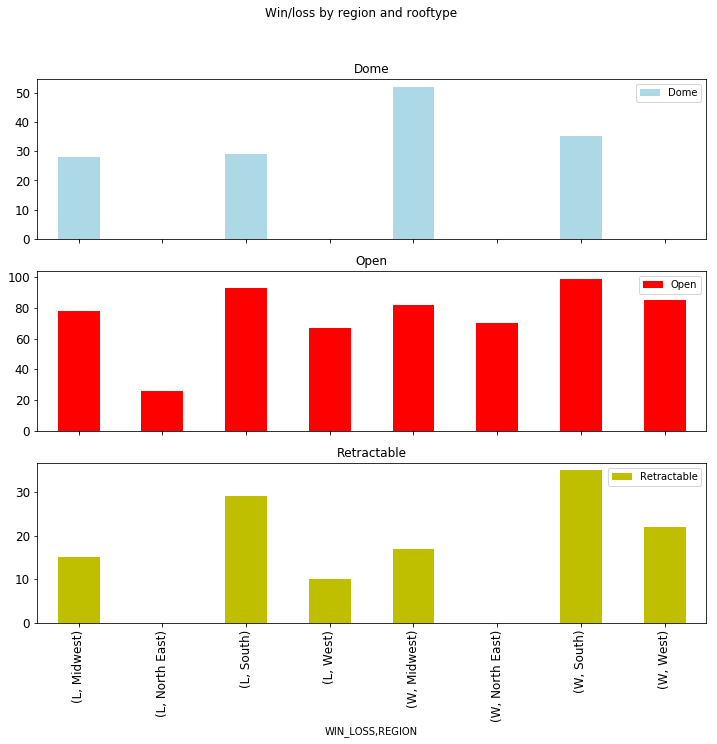

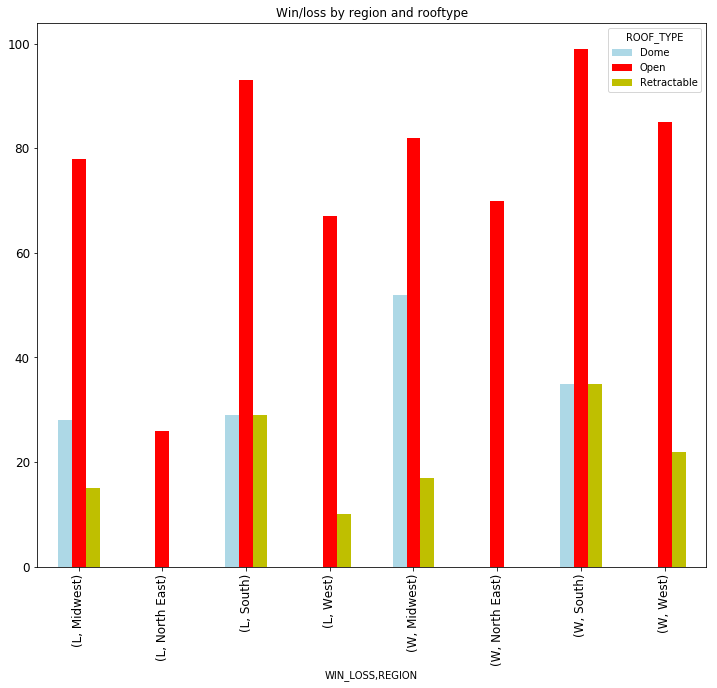

In [28]:
#bar graph 1 of 'WIN_LOSS','REGION','ROOF_TYPE' ---

Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','REGION','ROOF_TYPE']).size().unstack()

Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],subplots = 'true',figsize=(12,10),legend=True, fontsize=12,title='Win/loss by region and rooftype')
plt.savefig("Bargraph1.png",bbox_inches='tight')
Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],figsize=(12,10),legend=True, fontsize=12,title='Win/loss by region and rooftype')
plt.savefig("Bargraph1.png",bbox_inches='tight')





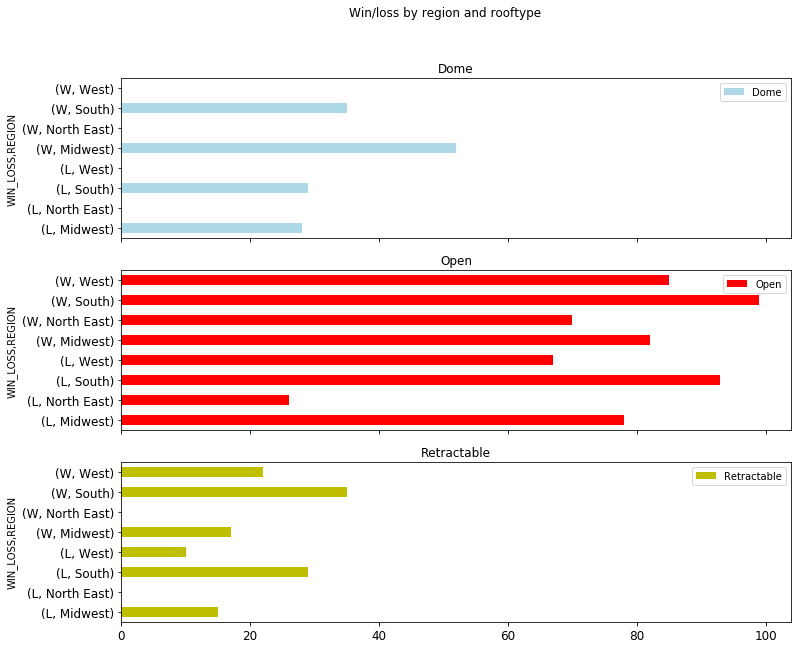

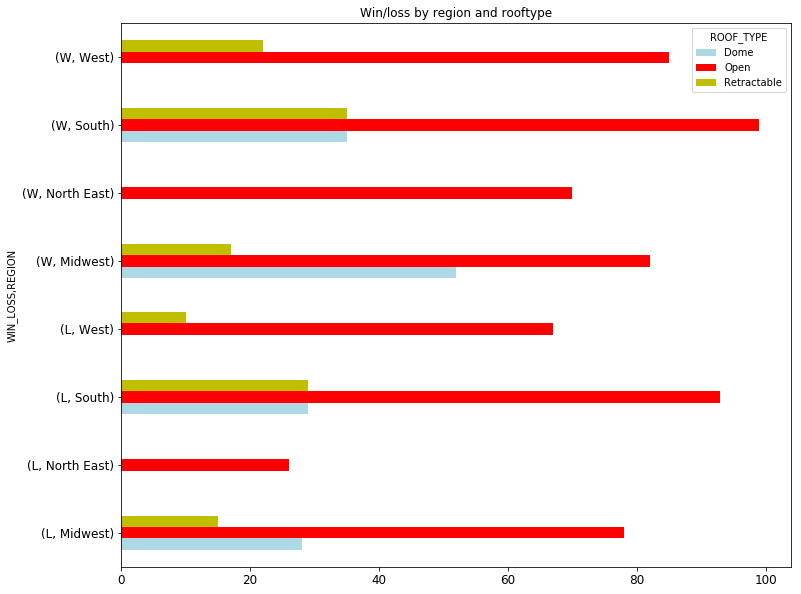

In [29]:
# Horizontal bar graph 1 of 'WIN_LOSS','REGION','ROOF_TYPE' ---


Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','REGION','ROOF_TYPE']).size().unstack()

Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],subplots = 'true',figsize=(12,10),legend=True, 
                        fontsize=12,title='Win/loss by region and rooftype')

plt.savefig("HBargraph1.png",bbox_inches='tight')




Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],figsize=(12,10),legend=True, fontsize=12,
                        title='Win/loss by region and rooftype')

plt.savefig("HBargraph1.png",bbox_inches='tight')






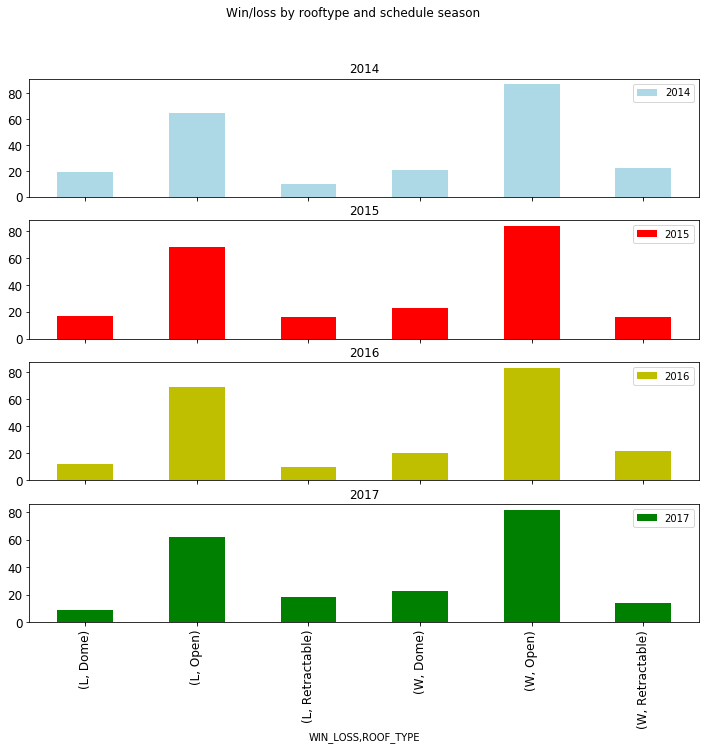

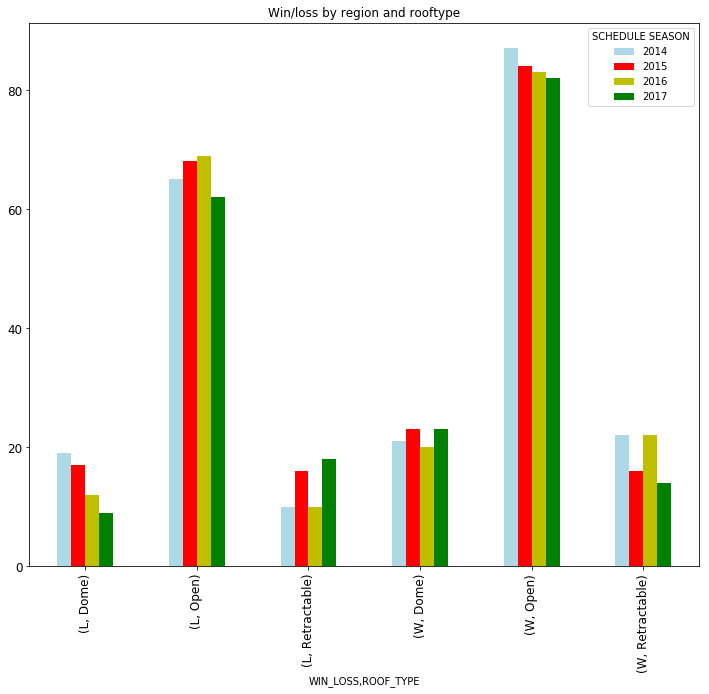

In [30]:
# bar graph 2 with --SCHEDULE SEASON, rooftype,win/loss,season ---

Bar_graph2_df=stadiums_merge_df.groupby(['WIN_LOSS','ROOF_TYPE','SCHEDULE SEASON']).size().unstack()


Bar_graph2_df.plot.bar(color=['LightBlue','R','Y','g'],subplots = 'true',figsize=(12,10),legend=True, 
                        fontsize=12,title='Win/loss by rooftype and schedule season',align="center")
 
plt.savefig("Bargraph2.png",bbox_inches='tight')

Bar_graph2_df.plot.bar(color=['LightBlue','R','Y','g'],figsize=(12,10),legend=True, 
                        fontsize=12,title='Win/loss by region and rooftype')

plt.savefig("Bargraph2.png",bbox_inches='tight')



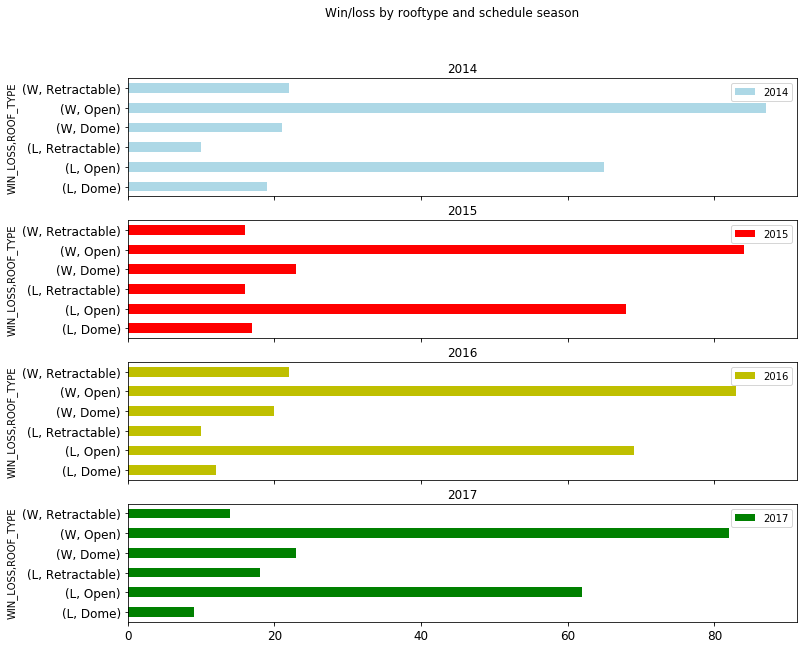

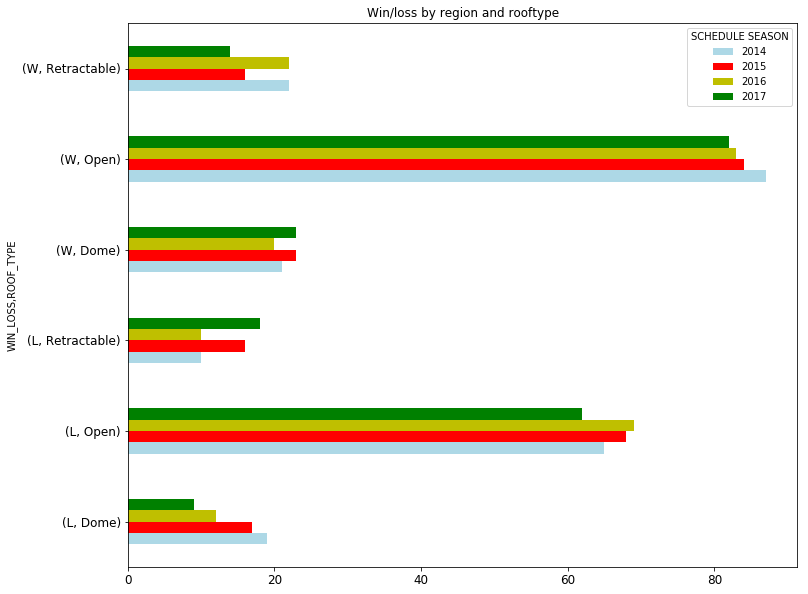

In [31]:
# Horizontal bar graph 2 with --SCHEDULE SEASON, rooftype,win/loss,season ---

Bar_graph2_df=stadiums_merge_df.groupby(['WIN_LOSS','ROOF_TYPE','SCHEDULE SEASON']).size().unstack()


Bar_graph2_df.plot.barh(color=['LightBlue','R','Y','g'],subplots = 'true',figsize=(12,10),legend=True, 
                        fontsize=12,title='Win/loss by rooftype and schedule season',align="center")
 
plt.savefig("HBargraph2.png",bbox_inches='tight')

Bar_graph2_df.plot.barh(color=['LightBlue','R','Y','g'],figsize=(12,10),legend=True, 
                        fontsize=12,title='Win/loss by region and rooftype')

                        

plt.savefig("HBargraph2.png",bbox_inches='tight')



